In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/social media addict.csv')
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,NaN,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      994 non-null    object 
 3   Platform                    992 non-null    object 
 4   Daily_Usage_Time (minutes)  998 non-null    float64
 5   Posts_Per_Day               999 non-null    float64
 6   Likes_Received_Per_Day      997 non-null    float64
 7   Comments_Received_Per_Day   995 non-null    float64
 8   Messages_Sent_Per_Day       997 non-null    float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


# **Data Preprocessing**

In [4]:
# check null values

df.isnull().sum()

,0
User_ID,0
Age,0
Gender,6
Platform,8
Daily_Usage_Time (minutes),2
Posts_Per_Day,1
Likes_Received_Per_Day,3
Comments_Received_Per_Day,5
Messages_Sent_Per_Day,3
Dominant_Emotion,0


In [5]:
# fill missing values in categorical column with mode value

categorical_columns = ['Gender', 'Platform']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [6]:
# Fill missing values in numerical columns

numerical_columns = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
                     'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [7]:
# check again if there are any missing values

df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Platform,0
Daily_Usage_Time (minutes),0
Posts_Per_Day,0
Likes_Received_Per_Day,0
Comments_Received_Per_Day,0
Messages_Sent_Per_Day,0
Dominant_Emotion,0


# **Data Visualization**

**Distributions of Key Numerical**

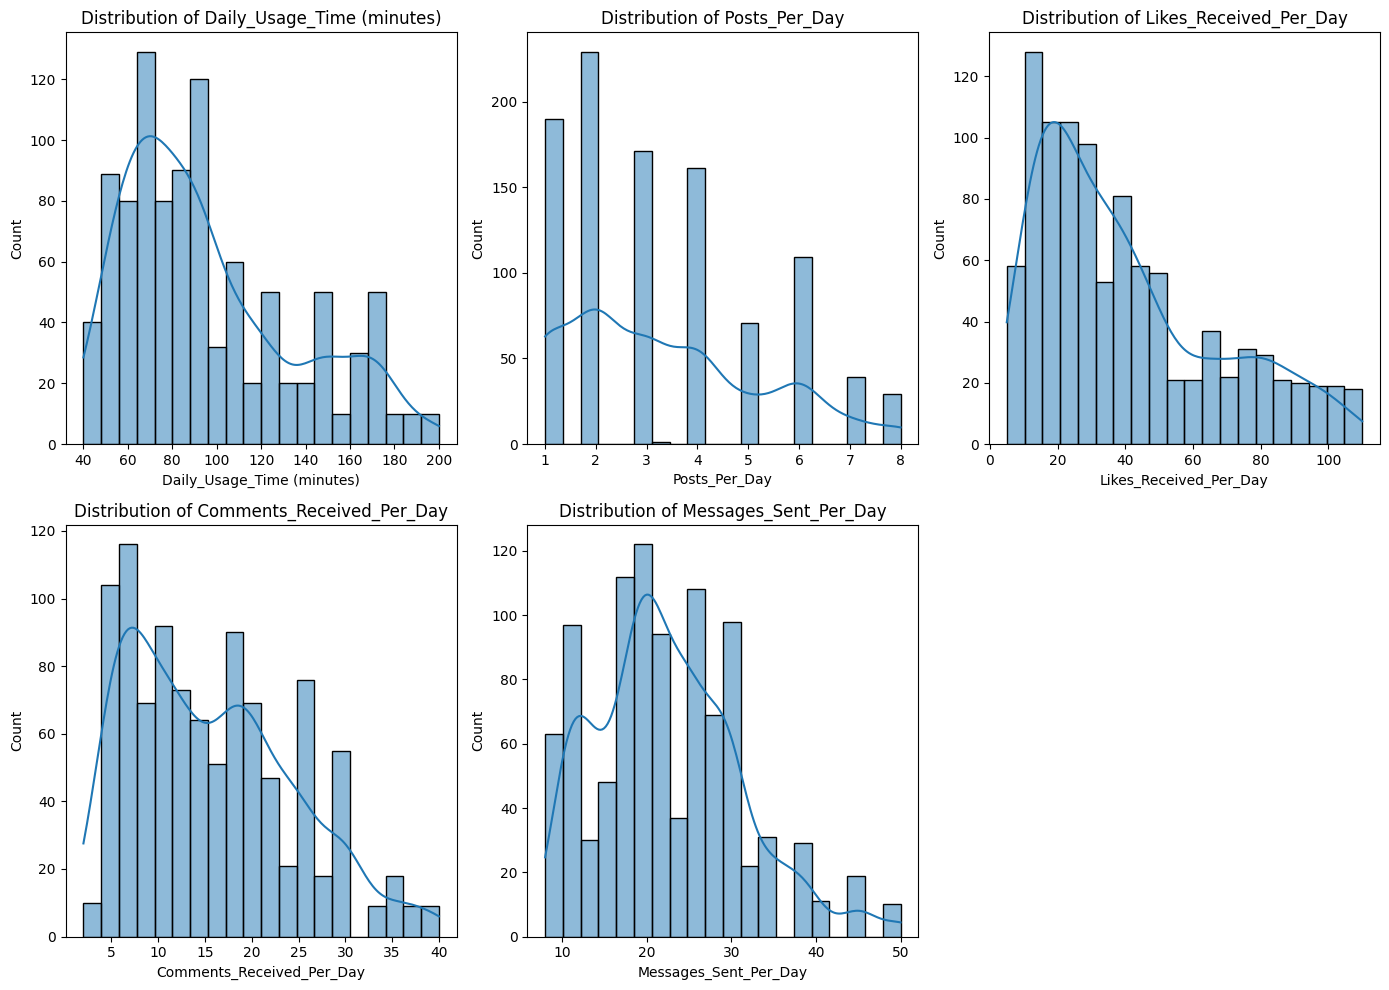

In [8]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
                            'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column].dropna(), kde=True, bins=20)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

**Categorical Variables**

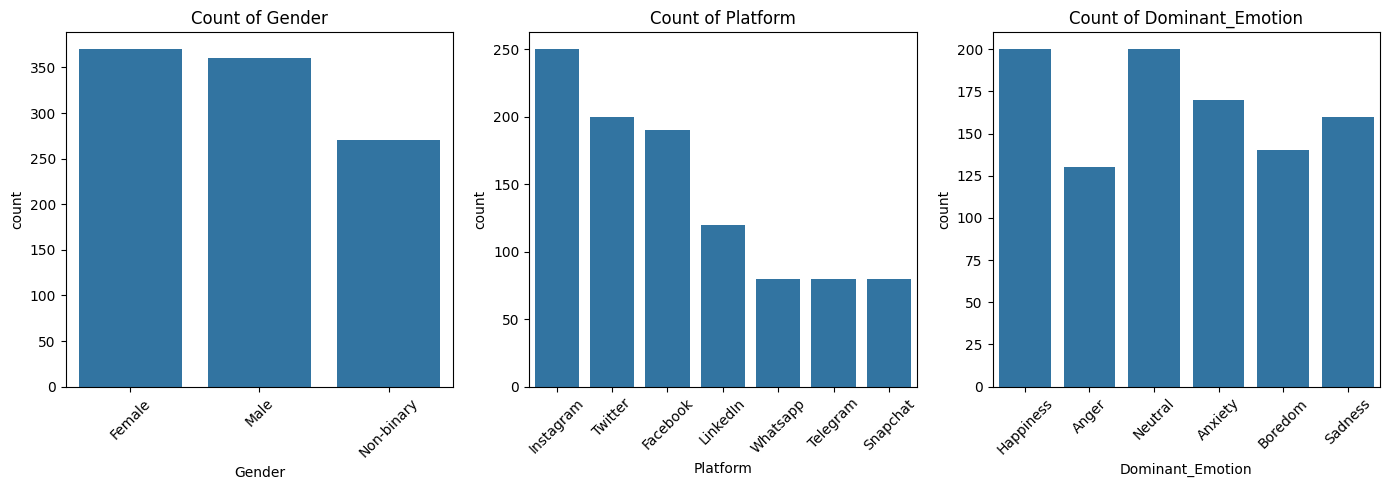

In [9]:
plt.figure(figsize=(14, 5))
for i, column in enumerate(['Gender', 'Platform', 'Dominant_Emotion']):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=column)
    plt.title(f"Count of {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Relationship between Daily Usage Time and other metrics**

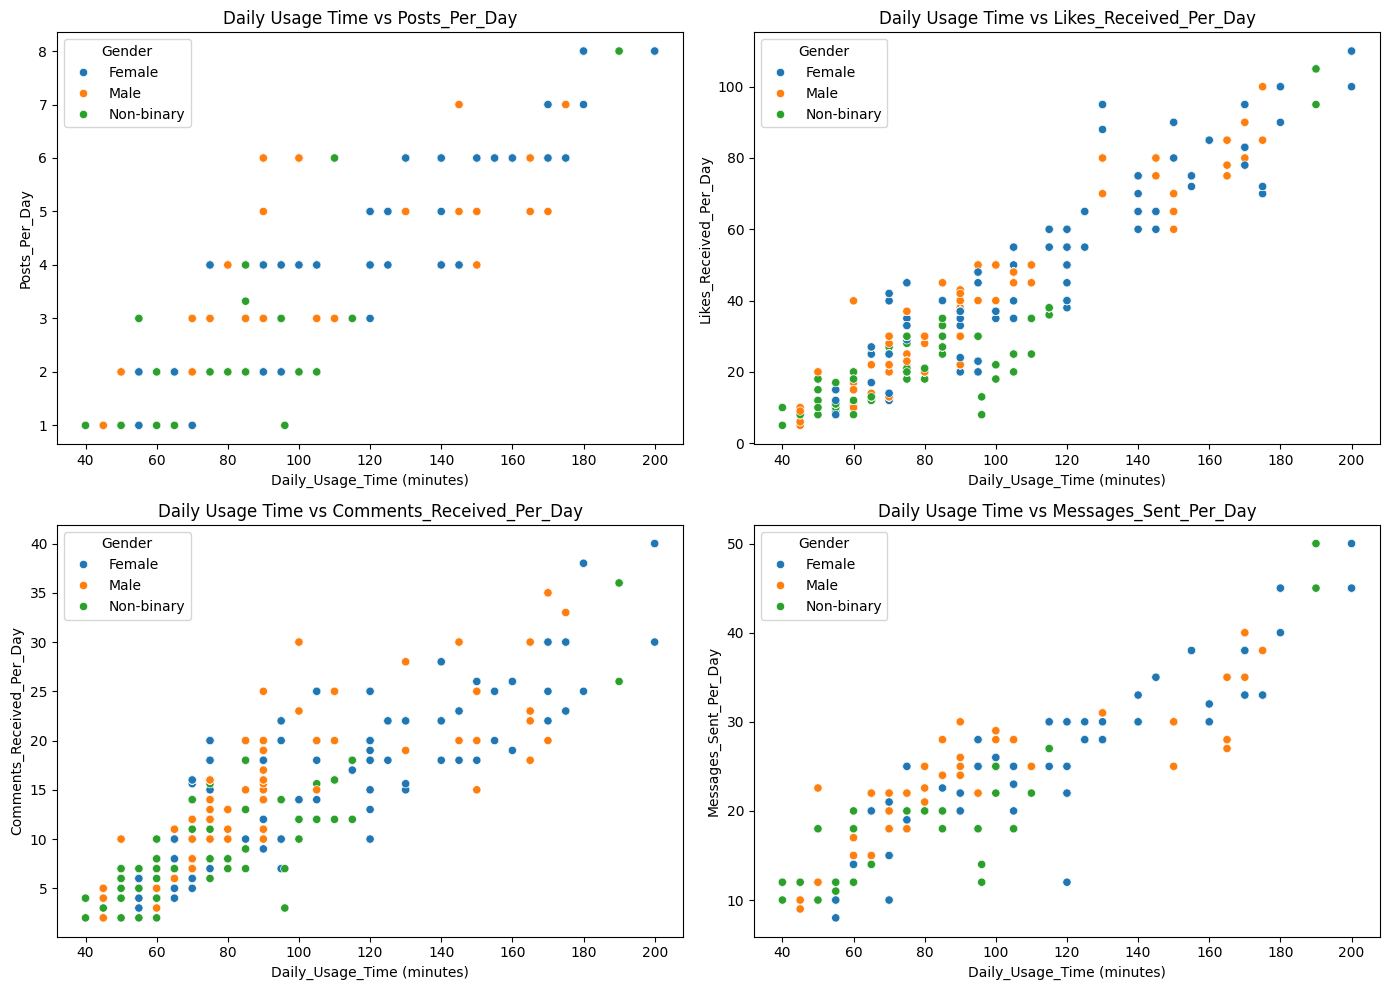

In [10]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(['Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
                            'Messages_Sent_Per_Day']):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x='Daily_Usage_Time (minutes)', y=column, hue='Gender')
    plt.title(f"Daily Usage Time vs {column}")
plt.tight_layout()
plt.show()

**Correlation Analysis - Correlation Heatmap for Numerical Features**

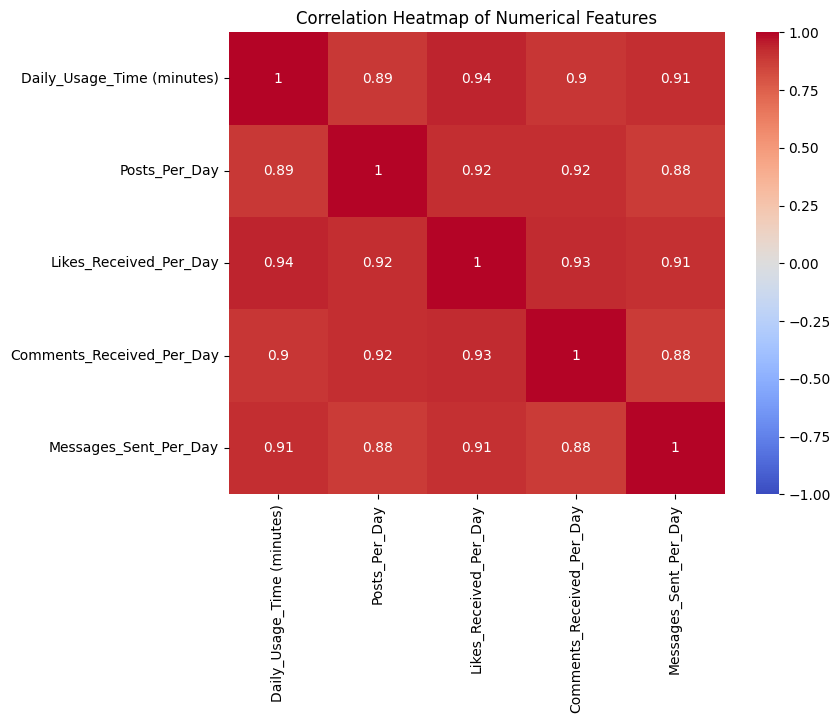

In [21]:
plt.figure(figsize=(8, 6))
numerical_columns = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
                     'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Feature Engineering**

* Encoding: Encoding process converts categorical variables into numerical formats.

* Here we will use 'One Hot Encoding', this method creates a new binary column for each category in a categorical feature

* Scaling: Scaling means adjusting the range of numerical features to ensure that all features contribute equally to the model.

# **Encoding**

In [22]:
# Use One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# **Scaling**

In [23]:
# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns])

# **Apply K-means Clustering**

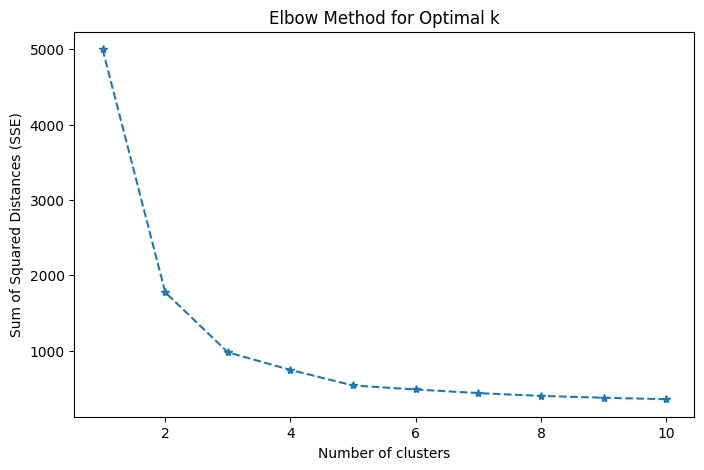

In [24]:
# Find optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='*', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

#**Fit K-means with chosen 'K'**

In [25]:
# we take 3, based on elbow plot

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers (scaled values):")
print(kmeans.cluster_centers_)

Cluster Centers (scaled values):
[[ 0.09141503  0.31119095  0.1390267   0.35582307  0.1960085 ]
 [-0.75821465 -0.83716833 -0.79792435 -0.85106536 -0.74811563]
 [ 1.67597882  1.50042804  1.69245333  1.45962477  1.47748292]]


# **Visualize clusters**

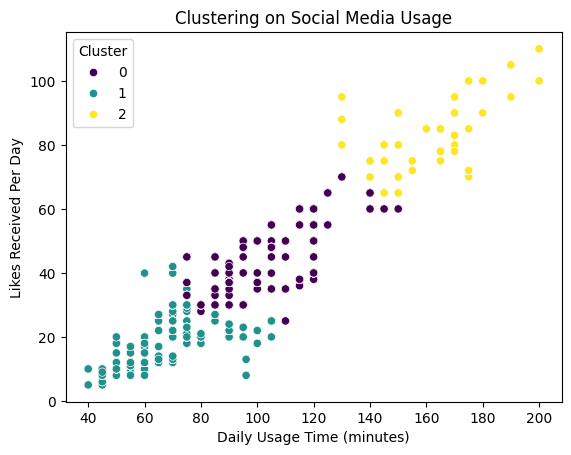

In [26]:
# Visualize clusters
sns.scatterplot(x=df['Daily_Usage_Time (minutes)'], y=df['Likes_Received_Per_Day'],
                hue=df['Cluster'], palette='viridis')
plt.title('Clustering on Social Media Usage')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Likes Received Per Day')
plt.legend(title='Cluster')
plt.show()

# **silhouette score**

In [27]:
# Calculate the silhouette score
sil_score = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score for {optimal_k} clusters: {sil_score}")

Silhouette Score for 3 clusters: 0.47854875962043397
